# Environmental Impact Analysis

Estimate the environmental impact in;
- carbon footprint saved, and
- landfill reduction based on the amount of material recycled.

In [1]:
#Import Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LENOVO T460S\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\LENOVO T460S\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# Load the Excel file to check the structure of the data
file_path = 'clean_waste_data_updated.xlsx'

# Load the excel file and display its sheet names
excel_data = pd.ExcelFile(file_path)

excel_data.sheet_names

['waste_owners_register', 'waste_collection_record', 'monthly_material_target']

In [3]:
dataframes = pd.read_excel(file_path, sheet_name=None)

waste_owners_register = dataframes['waste_owners_register']
waste_collection_record = dataframes['waste_collection_record']
monthly_material_target = dataframes['waste_collection_record']

### Adding the 'CO2_saved_kg' column to the data frame.

The calculation goes thus:
- ##### PET
Carbon emissions saved by recycling PET: Approximately 1.5 kg of CO₂ equivalent per 1 kg of PET recycled
Carbon Saved (kg CO₂)=Quantity of PET Recycled (kg)×1.5 kg CO₂

- ##### Aluminum Cans
Carbon emissions saved by recycling aluminum: Approximately 9 kg of CO₂ equivalent per 1 kg of aluminum recycled.
Carbon Saved (kg CO₂)=Quantity of Aluminum Recycled (kg)×9 kg CO₂

- ##### PP plastic
Carbon emissions saved by recycling PP plastic: Approximately 0.5 to 1.0 kg of CO₂ equivalent per 1 kg of PP recycled. A commonly accepted average is 0.7 kg CO₂ per kg of PP.
Carbon Saved (kg CO₂)=Quantity of PP Recycled (kg)×0.7 kg CO₂

- ##### Glass Bottles
Carbon emissions saved by recycling glass: Approximately 0.3 kg of CO₂ equivalent per 1 kg of glass recycled.

- ##### Cardboard Paper
Carbon emissions saved by recycling cardboard: Approximately 0.9 kg of CO₂ equivalent per 1 kg of cardboard recycled.
Carbon Saved (kg CO₂)=Quantity of Cardboard Recycled (kg)×0.9 kg CO₂

In [4]:
# Define the conditions for each material
conditions = [
    waste_collection_record['material_collected'] == "PET Plastic (water, soda, juices, etc)",
    waste_collection_record['material_collected'] == "Aluminum (can drinks)",
    waste_collection_record['material_collected'] == "Glass",
    waste_collection_record['material_collected'] == "PP Plastic (transparent take away packs)",
    waste_collection_record['material_collected'] == "Cardboard"
]

# Define the corresponding CO2_saved_kg multiplier for each material
multipliers = [1.5, 9, 0.3, 0.7, 0.9]

# Calculate CO2_saved_kg based on the conditions and multipliers
waste_collection_record['CO2_saved_kg'] = np.select(conditions, multipliers, default=0) * waste_collection_record['quantity_collected_kg']

waste_collection_record


,material_ID,customer_name,collection_date,collection_month,material_collected,quantity_collected_kg,cash_incentives,incentive_amount_naira,payment_date,comments,customer_review,CO2_saved_kg
0,MAT_001,Hopeland,2024-09-02,September,"PET Plastic (water, soda, juices, etc)",208,No,0,NaT,No comment,Poor,312.0
1,MAT_002,Hopeland,2024-09-02,September,Aluminum (can drinks),318,No,0,NaT,Well packaged,Fair,2862.0
2,MAT_003,Hopeland,2024-09-02,September,Glass,302,No,0,NaT,Well packaged,Average,90.6
3,MAT_004,Hopeland,2024-09-02,September,PP Plastic (transparent take away packs),72,No,0,NaT,Well packaged,Excellent,50.4
4,MAT_005,Hopeland,2024-09-02,September,Cardboard,294,No,0,NaT,Press,Poor,264.6
...,...,...,...,...,...,...,...,...,...,...,...,...
645,MAT_001,Maximus,2024-11-25,November,"PET Plastic (water, soda, juices, etc)",403,Yes,4030,2024-11-25,No comment,Average,604.5
646,MAT_002,Maximus,2024-11-25,November,Aluminum (can drinks),134,Yes,1340,2024-11-25,No comment,Good,1206.0
647,MAT_003,Maximus,2024-11-25,November,Glass,231,Yes,2310,2024-11-25,Remove label,Average,69.3
648,MAT_004,Maximus,2024-11-25,November,PP Plastic (transparent take away packs),380,Yes,3800,2024-11-25,No comment,Excellent,266.0


### Adding the 'land_fill_saved_m3' column to the data frame.

The calculation goes thus:

- ##### Aluminum cans: 
About 3 cubic meters per ton (1000kg)
- ##### PET plastic: 
About 1.5 cubic meters per ton
- ##### Cardboard: 
About 2.5 cubic meters per ton
- ##### Glass: 
1 ton = 0.3 cubic meters.
- ##### PP Plastics: 
1 ton = 1.8 cubic meters.

In [5]:
# Define the conditions for each material
conditions = [
    waste_collection_record['material_collected'] == "PET Plastic (water, soda, juices, etc)",
    waste_collection_record['material_collected'] == "Aluminum (can drinks)",
    waste_collection_record['material_collected'] == "Glass",
    waste_collection_record['material_collected'] == "PP Plastic (transparent take away packs)",
    waste_collection_record['material_collected'] == "Cardboard"
]

# Define the corresponding CO2_saved_kg multiplier for each material
multipliers = [0.0015, 0.003, 0.0003, 0.0018, 0.0025]

# Calculate CO2_saved_kg based on the conditions and multipliers
waste_collection_record['land_fill_saved_m3'] = np.select(conditions, multipliers, default=0) * waste_collection_record['quantity_collected_kg']

waste_collection_record

,material_ID,customer_name,collection_date,collection_month,material_collected,quantity_collected_kg,cash_incentives,incentive_amount_naira,payment_date,comments,customer_review,CO2_saved_kg,land_fill_saved_m3
0,MAT_001,Hopeland,2024-09-02,September,"PET Plastic (water, soda, juices, etc)",208,No,0,NaT,No comment,Poor,312.0,0.3120
1,MAT_002,Hopeland,2024-09-02,September,Aluminum (can drinks),318,No,0,NaT,Well packaged,Fair,2862.0,0.9540
2,MAT_003,Hopeland,2024-09-02,September,Glass,302,No,0,NaT,Well packaged,Average,90.6,0.0906
3,MAT_004,Hopeland,2024-09-02,September,PP Plastic (transparent take away packs),72,No,0,NaT,Well packaged,Excellent,50.4,0.1296
4,MAT_005,Hopeland,2024-09-02,September,Cardboard,294,No,0,NaT,Press,Poor,264.6,0.7350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,MAT_001,Maximus,2024-11-25,November,"PET Plastic (water, soda, juices, etc)",403,Yes,4030,2024-11-25,No comment,Average,604.5,0.6045
646,MAT_002,Maximus,2024-11-25,November,Aluminum (can drinks),134,Yes,1340,2024-11-25,No comment,Good,1206.0,0.4020
647,MAT_003,Maximus,2024-11-25,November,Glass,231,Yes,2310,2024-11-25,Remove label,Average,69.3,0.0693
648,MAT_004,Maximus,2024-11-25,November,PP Plastic (transparent take away packs),380,Yes,3800,2024-11-25,No comment,Excellent,266.0,0.6840


In [6]:
# Perform environmental impact analysis by aggregating total CO2_saved_kg and land_fill_saved_m3 by each customer in each month
impact_analysis = waste_collection_record.groupby(['customer_name', 'collection_month']).agg({
    'CO2_saved_kg': 'sum',
    'land_fill_saved_m3': 'sum'
}).reset_index()

# Display the result
impact_analysis.head()

,customer_name,collection_month,CO2_saved_kg,land_fill_saved_m3
0,Amala joint,November,13694.6,9.7218
1,Amala joint,October,13148.4,9.0425
2,Amala joint,September,21729.4,12.6413
3,D’mix,November,11519.0,8.8209
4,D’mix,October,13381.4,9.2013


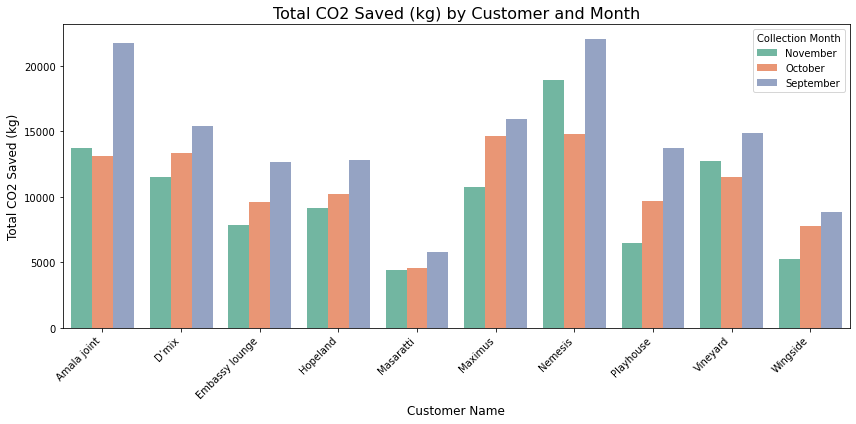

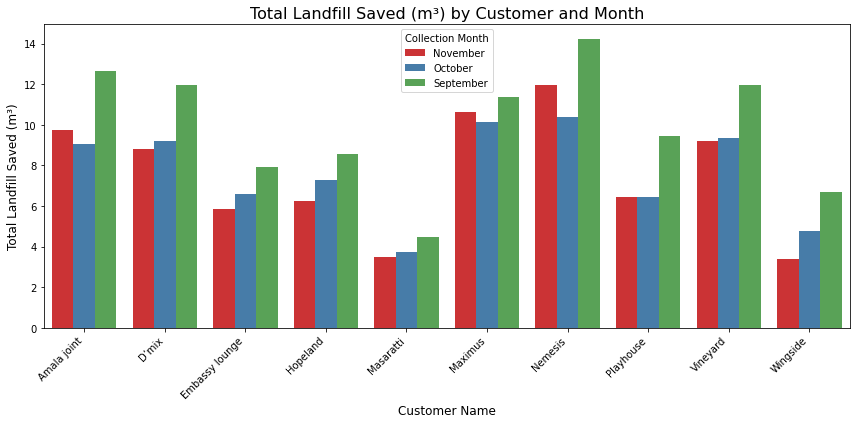

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the CO2 saved for each customer across months
plt.figure(figsize=(12, 6))

# Use seaborn's barplot for a clustered bar plot
sns.barplot(
    x='customer_name', y='CO2_saved_kg', hue='collection_month',
    data=impact_analysis, palette='Set2'
)

# Customize the plot
plt.title('Total CO2 Saved (kg) by Customer and Month', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total CO2 Saved (kg)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Collection Month')

plt.tight_layout()
plt.show()

# Plot land_fill_saved_m3 for each customer across months
plt.figure(figsize=(12, 6))

# Use seaborn's barplot for a clustered bar plot
sns.barplot(
    x='customer_name', y='land_fill_saved_m3', hue='collection_month',
    data=impact_analysis, palette='Set1'
)

# Customize the plot
plt.title('Total Landfill Saved (m³) by Customer and Month', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Landfill Saved (m³)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Collection Month')

plt.tight_layout()
plt.show()


#### Key observations from Total CO2 Saved (kg) by Customer and Month Chart:

1. Most customers show a trend of increasing CO2 savings from November to September.

2. Amada Jaint has the highest CO2 savings, particularly in September.

3. Nemesis shows high CO2 savings across all months, with a notable peak in November.

4. Some customers like Embassy lounge, Hopestaff, and Wingstop have relatively lower CO2 savings compared to others.

5. September generally shows the highest CO2 savings for most customers.

6. Maparatti has the lowest CO2 savings among all customers across all three months.

7. There's significant variation in CO2 savings between customers and across months, ranging from around 5,000 kg to over 20,000 kg.

This visualization helps compare the environmental impact of different customers over time, highlighting top performers and those with room for improvement in terms of CO2 reduction.


#### Key observations from Total Landfill Saved (m³) by Customer and Month Chart:

1. Most customers show an increasing trend in landfill savings from November to September.
2. Nemesis has the highest landfill savings across all months, with a notable peak in September.
3. Amada Jaint and D'arex also demonstrate high landfill savings, particularly in September.
4. Maparatti consistently has the lowest landfill savings among all customers for all three months.
5. September generally shows the highest landfill savings for most customers.
6. There's considerable variation in landfill savings between customers, ranging from about 4 m³ to over 14 m³.
7. Some customers like Embassy lounge, Hopestaff, and Wingstop show moderate landfill savings compared to the top performers.
8. Vineyard shows a consistent increase in landfill savings across the three months.

This visualization helps compare the environmental impact of different customers in terms of reducing landfill waste over time, highlighting top performers and those with potential for improvement.

In [8]:
# Find the customer with the highest CO2 saved
max_co2_customer = impact_analysis.loc[impact_analysis['CO2_saved_kg'].idxmax()]

# Find the customer with the lowest CO2 saved
min_co2_customer = impact_analysis.loc[impact_analysis['CO2_saved_kg'].idxmin()]

# Find the customer with the highest landfill saved
max_landfill_customer = impact_analysis.loc[impact_analysis['land_fill_saved_m3'].idxmax()]

# Find the customer with the lowest landfill saved
min_landfill_customer = impact_analysis.loc[impact_analysis['land_fill_saved_m3'].idxmin()]

# Display the results
print("Customer with the highest CO2 saved (kg):")
print(max_co2_customer)

print("\nCustomer with the lowest CO2 saved (kg):")
print(min_co2_customer)

print("\nCustomer with the highest landfill saved (m³):")
print(max_landfill_customer)

print("\nCustomer with the lowest landfill saved (m³):")
print(min_landfill_customer)


Customer with the highest CO2 saved (kg):
customer_name           Nemesis
collection_month      September
CO2_saved_kg            22058.5
land_fill_saved_m3      14.2335
Name: 20, dtype: object

Customer with the lowest CO2 saved (kg):
customer_name         Masaratti
collection_month       November
CO2_saved_kg             4432.5
land_fill_saved_m3       3.4675
Name: 12, dtype: object

Customer with the highest landfill saved (m³):
customer_name           Nemesis
collection_month      September
CO2_saved_kg            22058.5
land_fill_saved_m3      14.2335
Name: 20, dtype: object

Customer with the lowest landfill saved (m³):
customer_name         Wingside
collection_month      November
CO2_saved_kg            5264.5
land_fill_saved_m3      3.4039
Name: 27, dtype: object


In [9]:
# Calculate the total CO2_saved_kg and land_fill_saved_m3 across all customers
total_CO2_saved = impact_analysis['CO2_saved_kg'].sum()
total_landfill_saved = impact_analysis['land_fill_saved_m3'].sum()

# Calculate the percentage of CO2 saved by each customer
impact_analysis['percentage_CO2_saved'] = (impact_analysis['CO2_saved_kg'] / total_CO2_saved) * 100

# Calculate the percentage of landfill saved by each customer
impact_analysis['percentage_landfill_saved'] = (impact_analysis['land_fill_saved_m3'] / total_landfill_saved) * 100

# Show the updated DataFrame with percentage columns
impact_analysis.head()


,customer_name,collection_month,CO2_saved_kg,land_fill_saved_m3,percentage_CO2_saved,percentage_landfill_saved
0,Amala joint,November,13694.6,9.7218,3.868197,3.859110
1,Amala joint,October,13148.4,9.0425,3.713916,3.589459
2,Amala joint,September,21729.4,12.6413,6.137718,5.018018
3,D’mix,November,11519.0,8.8209,3.253674,3.501494
4,D’mix,October,13381.4,9.2013,3.779730,3.652495


In [10]:
# Perform environmental impact analysis by aggregating total CO2_saved_kg and land_fill_saved_m3 by each customer in each month
impact_analysis.groupby(['customer_name']).agg({
    'percentage_CO2_saved': 'sum',
    'percentage_landfill_saved': 'sum'
}).reset_index()



,customer_name,percentage_CO2_saved,percentage_landfill_saved
0,Amala joint,13.719831,12.466586
1,D’mix,11.384835,11.895131
2,Embassy lounge,8.505903,8.064999
3,Hopeland,9.075091,8.752524
4,Masaratti,4.185005,4.646548
5,Maximus,11.696616,12.771050
6,Nemesis,15.767535,14.515347
7,Playhouse,8.439779,8.867442
8,Vineyard,11.045175,12.119450
9,Wingside,6.180228,5.900923


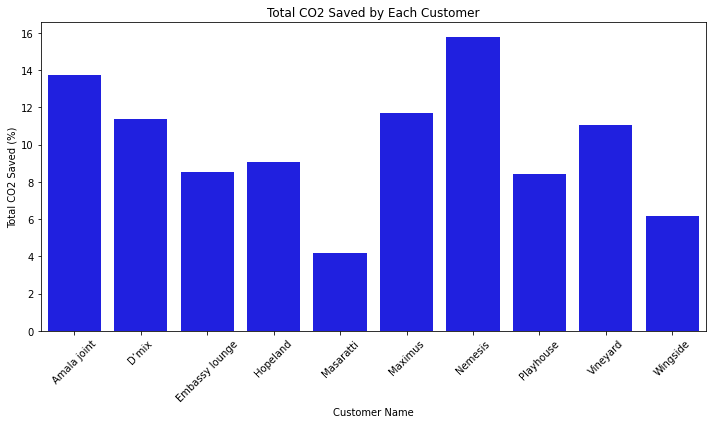

In [11]:
# Perform the aggregation
impact_summary = impact_analysis.groupby('customer_name').agg({
    'percentage_CO2_saved': 'sum',
    'percentage_landfill_saved': 'sum'
}).reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))

# Plot percentage_CO2_saved
sns.barplot(data=impact_summary, x='customer_name', y='percentage_CO2_saved', color='blue')
plt.title('Total CO2 Saved by Each Customer')
plt.xlabel('Customer Name')
plt.ylabel('Total CO2 Saved (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

This bar chart displays the total CO2 saved by each customer, represented as a percentage of the overall CO2 savings across all customers.

Key observations:

1. Nemesis stands out as the top performer, saving approximately 16% of the total CO2.

2. Amada Jaint follows closely, with about 14% of total CO2 savings.

3. Mavxmus and D'arex are also significant contributors, each saving around 11-12% of the total CO2.

4. Veriyard, Hopestaff, and Embassy lounge fall in the middle range, each contributing between 8-11% of total savings.

5. Maparatti has the lowest contribution, saving only about 4% of the total CO2.

6. There's a considerable range in contributions, from Maparatti's 4% to Nemesis' 16%, indicating significant variation in environmental impact among customers.

7. Wingstop and Playhouse are on the lower end of the spectrum, each contributing around 6-8% of total CO2 savings.

This visualization helps identify the customers making the most significant contributions to CO2 reduction, as well as those who might have room for improvement in their environmental practices.

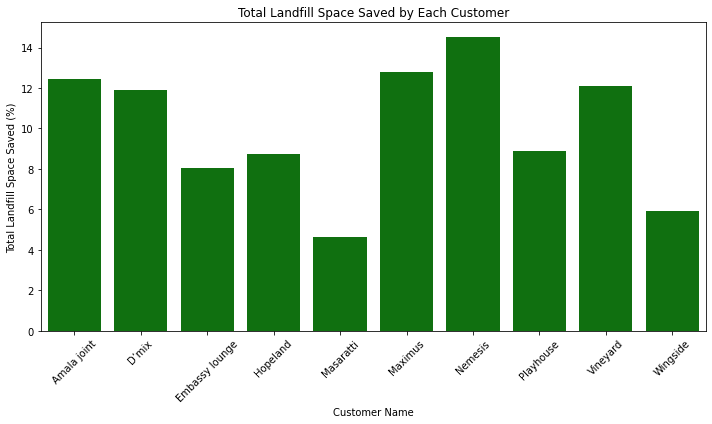

In [12]:
# Create another plot for percentage_landfill_saved
plt.figure(figsize=(10, 6))

# Plot percentage_landfill_saved
sns.barplot(data=impact_summary, x='customer_name', y='percentage_landfill_saved', color='green')
plt.title('Total Landfill Space Saved by Each Customer')
plt.xlabel('Customer Name')
plt.ylabel('Total Landfill Space Saved (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

This bar chart illustrates the total landfill space saved by each customer, represented as a percentage of the overall landfill space saved across all customers.

Key observations:

1. Nemesis is the top performer, saving approximately 14.5% of the total landfill space.

2. Amada Jaint and Mavxmus follow closely, each saving about 12.5-13% of the total landfill space.

3. D'arex and Veriyard are also significant contributors, each saving around 12% of the total landfill space.

4. Embassy lounge, Hopestaff, and Playhouse fall in the middle range, each contributing between 8-9% of total savings.

5. Maparatti has the lowest contribution, saving only about 4.5% of the total landfill space.

6. Wingstop is the second-lowest contributor, saving about 6% of the total landfill space.

7. There's a notable range in contributions, from Maparatti's 4.5% to Nemesis' 14.5%, indicating significant variation in waste reduction impact among customers.

This visualization helps identify the customers making the most significant contributions to landfill space reduction, as well as those who might have potential for improving their waste management practices. The distribution of landfill space savings appears to be similar to the CO2 savings chart, suggesting a possible correlation between these two environmental metrics across customers.

**Short Note**

Customers have demonstrated a commendable commitment to environmental conservation, with significant achievements in CO2 reduction and landfill space saving. However, the varying performance levels and decline trend in target achievement highlight the need for continued support, education, and incentivization to maintain and improve our collective environmental impact.